## Write SQL queries to the database and save the results as a csv file

In [7]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# importing libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [9]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# setting parameters

db_config = {'user': 'praktikum_student', 
            'pwd': 'Sdf4$2;d-d30pp', 
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, 
            'db': 'data-analyst-zen-project-db'} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

In [10]:
# saving the connector
engine = create_engine(connection_string)

In [11]:
# generate a query
query = ''' SELECT *
            FROM dash_visits
        '''

# executing the query and saving the result in the DataFrame.

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [12]:
# displaying the head of the DataFrame
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


## Data overview

In [13]:
# printing information about the DataFrame
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
record_id       30745 non-null int64
item_topic      30745 non-null object
source_topic    30745 non-null object
age_segment     30745 non-null object
dt              30745 non-null datetime64[ns]
visits          30745 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


- There are no gaps;
- Data types are correct.

In [5]:
# checking for duplicates
dash_visits.duplicated().sum()

0

- There are no duplicates

**Checking column record_id**

In [6]:
# computing a summary of statistics
dash_visits['record_id'].describe()

count    3.074500e+04
mean     1.055969e+06
std      8.875461e+03
min      1.040597e+06
25%      1.048283e+06
50%      1.055969e+06
75%      1.063655e+06
max      1.071341e+06
Name: record_id, dtype: float64

In [7]:
# counting unique values 
dash_visits['record_id'].nunique()

30745

There are 30745 unique records in the DataFrame.

**Checking columns item_topic, source_topic, age_segment**

In [8]:
# counting unique values
for row in ['item_topic', 'source_topic', 'age_segment']:
    print(row)
    print()
    print(dash_visits[row].value_counts())

item_topic

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64
source_topic

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                137

No errors

**Checking column dt**

In [9]:
# computing a summary of statistics
dash_visits['dt'].describe()

count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

In [10]:
# sorting
dash_visits['dt'].sort_values().unique()

array(['2019-09-24T18:28:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:32:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:34:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:53:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000'], dtype='datetime64[ns]')

Only 17 timestamps.

**Checking column visits**

In [14]:
# computing a summary of statistics
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

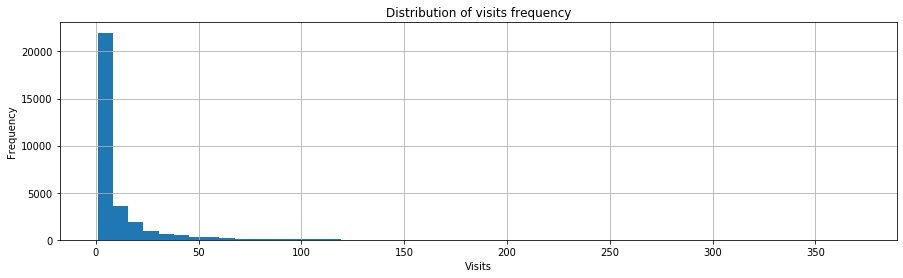

In [29]:
# plotting a histogram 
dash_visits['visits'].hist(bins=50, figsize=(15,4))
plt.title('Distribution of visits frequency')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.show()

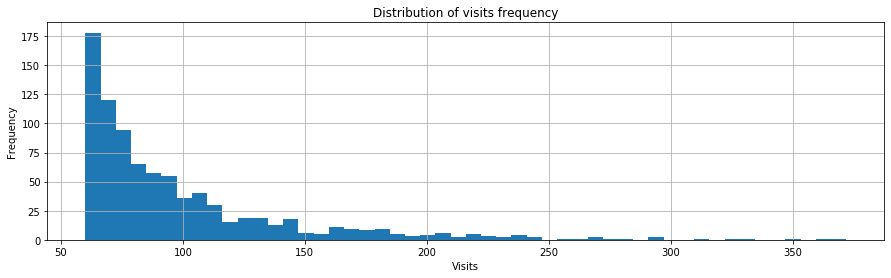

In [26]:
# plotting a histogram with a range from 60 to 372
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(60,372))
plt.title('Distribution of visits frequency')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.show()

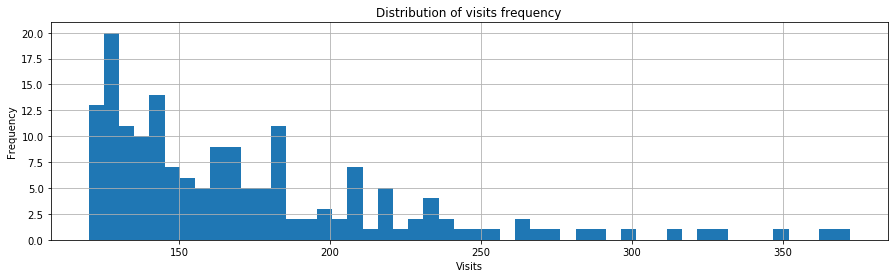

In [28]:
# plotting a histogram with a range from 120 to 372
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(120,372))
plt.title('Distribution of visits frequency')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.show()

A significant majority of the values are located from 1 to 25. There are many large values - up to 371. We leave everything as it is.

**Conclusion**

There are no errors in the data types; there are no duplicates; the data does not require processing. A significant majority of the values are located from 1 to 25. There are many large values - up to 371. We leave everything as it is.

## Exporting the data to a csv file

In [15]:
# exporting data to a csv file
dash_visits.to_csv('dash_visits.csv', index=False)

In [16]:
# testing the exported csv
test_visits = pd.read_csv('dash_visits.csv')
test_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


Data exported successfully to 'dash_visits.csv'.